In [8]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
import matplotlib as mpl
import scipy as sp
from scipy import stats
from scipy import signal
from scipy import fft
from scipy import io
from scipy import interpolate
from scipy import optimize
from scipy import linalg
from scipy import integrate
from scipy.fft import dct
from scipy import signal

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{textcomp}',
    r'\usepackage{wasysym}']
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'STIXGeneral'
from BackDiffuse_LT import BackDiffuse


showFigs=True

In [2]:
    # Core names of cores available
coreNames = ['Crete', 'SiteA', 'SiteB', 'SiteD', 'SiteE', 'SiteG']

    # Selecting core name
coreName = 'Crete'

    # Reading datafiles for specific core
d18OData = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/datasets/Alphabet_cores/Alphabetd18O/'+coreName+'_det.txt',',')
densities = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/datasets/Alphabet_cores/AlphabetDens/'+coreName+'DepthDens_w_Models.txt','\t')
diffLens = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/datasets/Alphabet_cores/AlphabetDiff/'+coreName+'_DepthDiff.txt','\t')
specsCores = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt',',')
specIdx = specsCores['CoreName'][specsCores['CoreName'] == coreName].index[0]

    # Set the specs for depth of Laki and Tambora eruptions for core
specsCore = specsCores.iloc[specIdx]
dTamb = np.float64(specsCore['dTamb'])
dLaki = np.float64(specsCore['dLaki'])

    # (FOR PLOTTING) Make array of only d18O data between Laki and Tamb
depth_LT = d18OData['depth'][(d18OData['depth'] >= dTamb) & (d18OData['depth'] <= dLaki)]
d18O_LT = d18OData['d18O'][(d18OData['depth'] >= dTamb) & (d18OData['depth'] <= dLaki)]





In [3]:
    # Create instance of back diffusion
inst = BackDiffuse(coreName, d18OData, specsCores, dTamb, dLaki, 32, diffLenData=diffLens[['Depth','sigma_o18']], densData=densities)

    # Make spectral estimate of diff len
diffLen = inst.spectralEstimate()

    # Make model/empiric estimate of diff len
difflenEstHL = inst.diffLenEstimateHL()

    # Compute final depth/d18O back diffused data w. final diff len and No. peaks
depth, data, diffLen, peaks = inst.backDiffused()


Starting sigma: 6.17 [cm]
34
33
32
32
32
32
33
Final sigma: 6.09 [cm]
Final # of peaks: 32


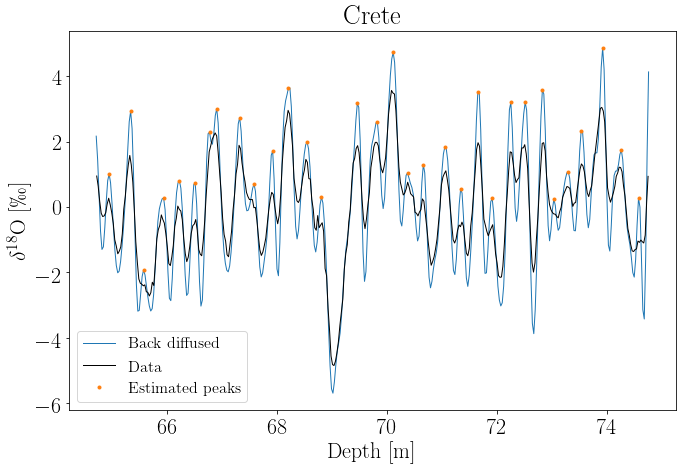

In [9]:
    # Plot original data, back diffused data and peak estimations
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(depth, data, lw=1, label='Back diffused')
ax.plot(depth_LT, d18O_LT-np.mean(d18O_LT),color='k', lw=1, label = 'Data')
ax.plot(depth[peaks], data[peaks],'.',lw=1, label='Estimated peaks')
ax.set(xlabel = 'Depth [m]', ylabel = '$\delta^{18}$O [\permil]', title=coreName)
ax.legend(fontsize=16)
fig.tight_layout()


Starting sigma: 6.17 [cm]
34
33
32
32
32
32
33
Final sigma: 6.09 [cm]
Final # of peaks: 32


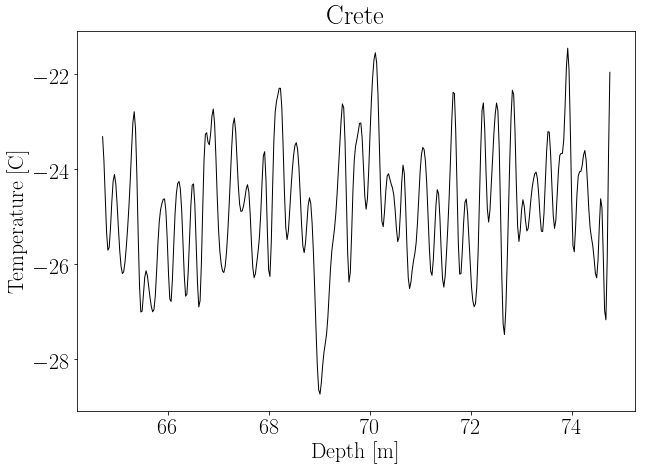

In [10]:
    # Compute temperature estimate in [K]
depthT, dataT = inst.DeltaToTemp()

    # Plot Temperature data in [C]
fig2, ax2 = plt.subplots(figsize=(10,7))
ax2.plot(depthT, dataT-273.15,color='k', lw=1)
ax2.set(xlabel = 'Depth [m]', ylabel = 'Temperature [C]', title=coreName)
fig2.savefig(coreName + '_Temp.jpg')

In [11]:
import h5py
filename = '/home/thea/MesterTesen/CFM-thea/cfm_mytests/steady_state_test_results_temp/SiteA_test.hdf5' 

f = h5py.File(filename,'r')
for key in f.keys():
    print(key)
    
age = f['age'][()]
depth = f['depth'][()]
temperature = f['temperature'][()]
Modelclimate = f['Modelclimate'][()]
density = f['density'][()]
#isotopes= f['isotopes'][()]
iso_sigma18 = f['iso_sigma18'][()]
iso_dsigma2_dt_18 = f['iso_dsigma2_dt_18'][()]
drho_dt = f['drho_dt'][()]

Modelclimate
age
density
depth
drho_dt
iso_dsigma2_dt_17
iso_dsigma2_dt_18
iso_dsigma2_dt_D
iso_sigma17
iso_sigma18
iso_sigmaD
temperature


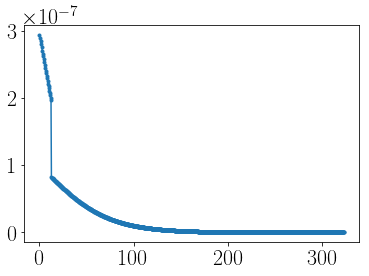

In [12]:
fig, ax = plt.subplots()
ax.plot(depth[-1][1:],drho_dt[-1][1:],'.-')
#ax.set(ylim=(243,244.5))

In [13]:
ys_d18O_forcing_SiteA = np.hstack(np.array([np.arange(1891,1920),np.arange(1931,1960)]))-1985
d18O_forcing_SiteA = np.hstack(np.array([-34.02*np.ones(1920-1891),-32.86*np.ones(1960-1931)]))

d18O_forcing_SiteA_Full = np.asarray([ys_d18O_forcing_SiteA,d18O_forcing_SiteA])

In [14]:


ys_accum_forcing_SiteA = np.arange(1943,1973) - 1985
accum_forcing_SiteA = 0.307 * np.ones(1973-1943)

accum_forcing_SiteA_Full = np.asarray([ys_accum_forcing_SiteA,accum_forcing_SiteA])

In [15]:
ys_temp_forcing_SiteA = np.arange(1948,1985)-1985
temp_forcing_SiteA = 29.41 * np.ones(1985-1948)+273.15

temp_forcing_SiteA_Full = np.asarray([ys_temp_forcing_SiteA,temp_forcing_SiteA])

In [16]:
np.savetxt('/home/thea/MesterTesen/CFM-thea/cfm_mytests/cfm_my_forcings/temp_forcing_SiteA_TEST.csv',temp_forcing_SiteA_Full,delimiter=',')
np.savetxt('/home/thea/MesterTesen//CFM-thea/cfm_mytests/cfm_my_forcings/accum_forcing_SiteA_TEST.csv',accum_forcing_SiteA_Full,delimiter=',')
np.savetxt('/home/thea/MesterTesen/CFM-thea/cfm_mytests/cfm_my_forcings/d18O_forcing_SiteA_TEST.csv',d18O_forcing_SiteA_Full,delimiter=',')

In [ ]:
d18O_forcing_SiteA_Full

In [ ]:
test = pd.read_csv('/home/thea/MesterTesen/CFM-thea/cfm_mytests/cfm_my_forcings/accum_forcing_SiteA_TEST2.csv',',',header=None).transpose()

In [ ]:
np.loadtxt('/home/thea/MesterTesen/CFM-thea/cfm_mytests/cfm_my_forcings/temp_forcing_SiteA_TEST.csv',delimiter=',')

In [ ]:
test